라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


학습,예측 데이터셋 나누기

In [4]:
(df["Insulin"]>0).value_counts()

True     394
False    374
Name: Insulin, dtype: int64

In [7]:
#train 세트를 만들기
train = df[df["Insulin"]>0].copy()
train.shape

(394, 9)

In [8]:
#test 세트를 만들기

test = df[df["Insulin"] == 0].copy()
test.shape

(374, 9)

학습,예측에 사용할 컬럼

In [10]:
#feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져온다.
feature_names = test.columns.tolist()
feature_names.remove("Insulin")
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

정답값이자 예측해야될값

In [11]:
#label_name 이라는 변수에 예측할 컬럼의 이름을 담는다.

label_name = "Insulin"
label_name

'Insulin'

학습,예측 데이터셋만들기

In [12]:
#학습세트만들기
X_train = train[feature_names]
X_train.shape

(394, 8)

In [13]:
#정답값 만들기
y_train = train[label_name]
y_train.shape

(394,)

In [15]:
#예측에 사요할 데이터세트
X_test = test[feature_names]
X_test.shape

(374, 8)

In [16]:

#예측의 정답값
y_test = test[label_name]
y_test.shape

(374,)

머신러닝 알고리즘 가져오기

In [17]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model

DecisionTreeRegressor(random_state=42)

10  학습(훈련)
시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [19]:
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

cross validation 으로 학습 세트의 오차 측정하기

In [22]:
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(model, X_train,y_train, cv=5, verbose=2, n_jobs=-1)
y_predict[:5]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


array([ 25., 480.,  55., 145., 495.])

In [23]:
# 정답을 정확하게 맞춘 갯수
(y_predict == y_train).sum()

3

In [24]:
len(y_train)

394

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Insulin'>

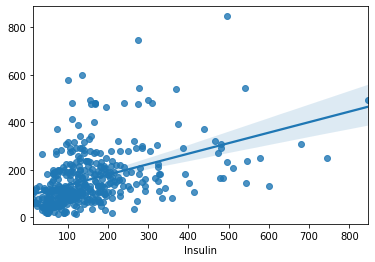

In [25]:
# regplot 으로 결과 값을 비교합니다
sns.regplot(y_train, y_predict)

In [26]:
# r2_score 를 구합니다.
from sklearn.metrics import r2_score
r2_score(y_train, y_predict)

-0.14429295602725567

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

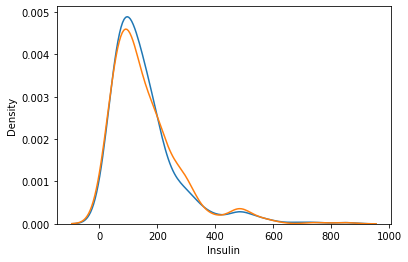

In [34]:
# distplot으로 정답값과 예측값의 분포를 그립니다.

sns.distplot(y_train, hist=False, label=("train"))
sns.distplot(y_predict, hist=False, label=("predict"))

12  오차 구하기

In [35]:
#MAE 에러의 평균오차
error = abs(y_train - y_predict)
error.mean()

86.57106598984771

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

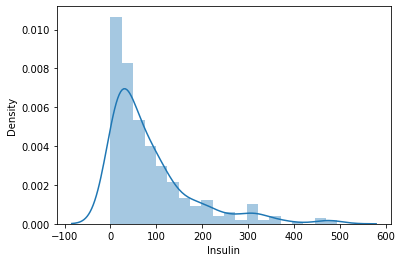

In [36]:
sns.distplot(error)

In [37]:
error.describe()

count    394.000000
mean      86.571066
std       92.896321
min        0.000000
25%       22.250000
50%       55.000000
75%      115.000000
max      495.000000
Name: Insulin, dtype: float64

In [39]:
#RMSE 표준편차 랑 비슷

np.sqrt(((y_train - y_predict) ** 2).mean())

126.89512636995443

트리알고리즘 분석하기

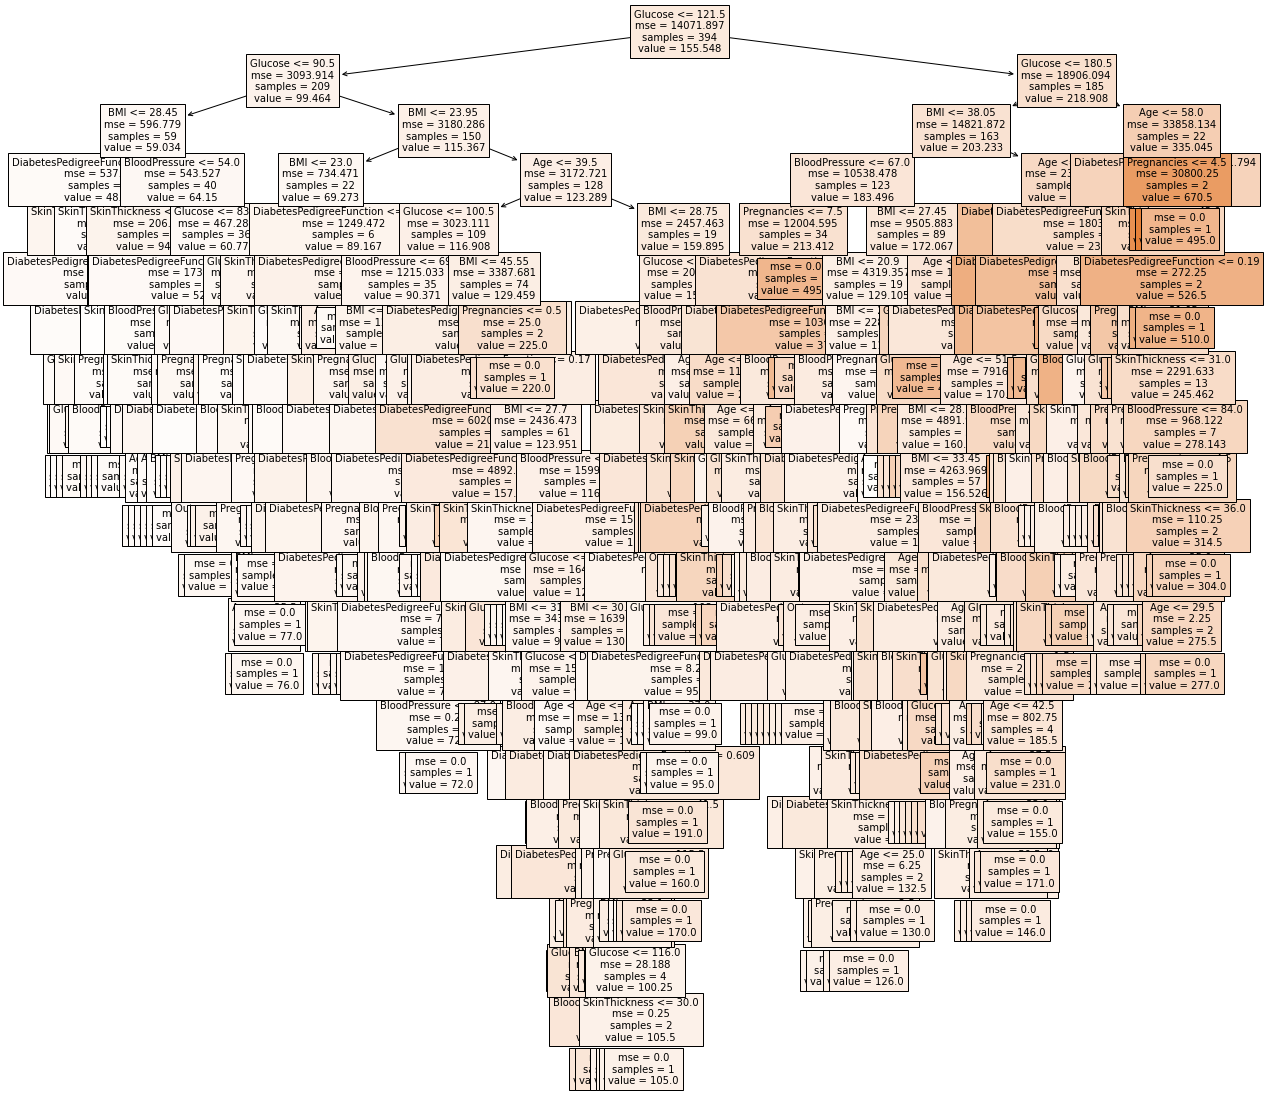

In [40]:
#plot_tree로 시각화 하기
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
tree = plot_tree(model, feature_names = feature_names, filled=True, fontsize=10)

In [41]:
#피처의 중요도 추출하기
model.feature_importances_

array([4.20201517e-02, 4.08219914e-01, 6.24932543e-02, 5.97519119e-02,
       1.10296456e-01, 1.63917473e-01, 1.52984660e-01, 3.16179009e-04])

<AxesSubplot:>

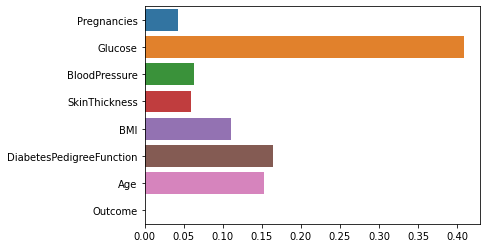

In [43]:
#피처의 중요도 시각화하기
sns.barplot(x=model.feature_importances_, y=feature_names)

예측

In [44]:
y_test = model.predict(X_test)
y_test[:5]

array([168.,  37., 145.,  36., 182.])

In [46]:
train.groupby("Outcome")["Insulin"].agg(["mean", "median"])

,mean,median
Outcome,,
0,130.287879,102.5
1,206.846154,169.5


In [47]:
train.groupby("Outcome")["Insulin"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,264.0,130.287879,102.482237,15.0,66.0,102.5,161.25,744.0
1,130.0,206.846154,132.699898,14.0,127.5,169.5,239.25,846.0


In [48]:
test["Insulin"] = y_test

In [49]:
test.groupby("Outcome")["Insulin"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,236.0,133.161017,102.224032,15.0,64.0,99.5,158.25,600.0
1,138.0,212.434783,141.952236,44.0,115.0,176.0,267.00,846.0


<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

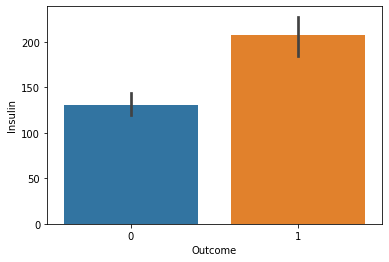

In [50]:
#Insulin 평균값 출력
sns.barplot(data=train, x="Outcome", y="Insulin")

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

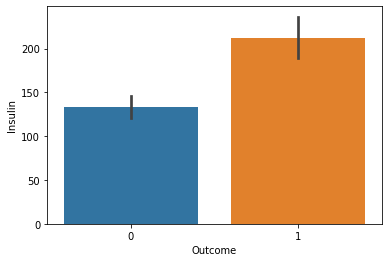

In [51]:
#예측값에 대해서 시각화
sns.barplot(data=test, x="Outcome", y="Insulin")